### 数据集

In [2]:
import  numpy   as np
import matplotlib.pyplot as plt

In [2]:
#生成线性数据
w, b = 1.8, 2.5

In [3]:
#生成线性数据
np.random.seed(0)
x = np.random.rand(100) * 4 - 2
noise = np.random.randn(100) / 3
#公式 y = wx +b
y = w * x + b + noise

In [4]:
#把行变成列
x = x.reshape(-1, 1)
x.shape, y.shape

((100, 1), (100,))

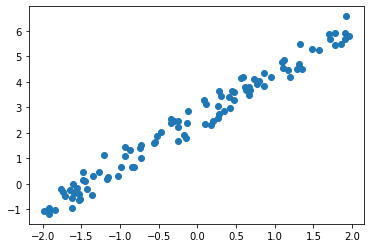

In [5]:
#进行描点 画图
plt.scatter(x, y)
plt.show()

### sklearn中的神经网络

In [6]:
# hidden_layer_sizes=(1,)：

# 这是一个元组，表示隐藏层的结构。在这个例子中，只有一个隐藏层，且该层中有1个神经元。如果需要更多隐藏层或更多神经元，可以相应地调整元组中的值。
# 例如，hidden_layer_sizes=(10, 5) 表示有两层隐藏层，第一层有10个神经元，第二层有5个神经元。
# activation='identity'：

# 指定隐藏层的激活函数。'identity'  也就是不要激活函数
# f(x)=x。这是线性激活函数，对数据不做非线性变换。
# 其他可能的激活函数有 'relu'（修正线性单元），'tanh'（双曲正切），'logistic'（逻辑函数，即sigmoid）。
# learning_rate_init=0.01：

# 指定初始学习率。学习率决定了每次更新权重时步长的大小。较小的学习率可以使模型收敛得更稳健，但可能需要更多的迭代次数；较大的学习率可以加快收敛速度，但可能导致模型不稳定。
# random_state=233：

# 设置随机种子，确保结果的可重复性。指定一个整数值可以固定随机数生成器的种子，从而使每次运行代码时得到相同的结果。这对于调试和比较不同模型时非常有用。from sklearn.neural_network import MLPRegressor

In [7]:
reg= MLPRegressor(
    hidden_layer_sizes=(1,),
    activation='identity',
    learning_rate_init=0.01,
    random_state=233
)

In [8]:
reg.fit(x, y)

MLPRegressor(activation='identity', hidden_layer_sizes=(1,),
             learning_rate_init=0.01, random_state=233)

In [9]:
reg.score(x, y)

0.974674992013746

In [10]:
y_pred = reg.predict(x)

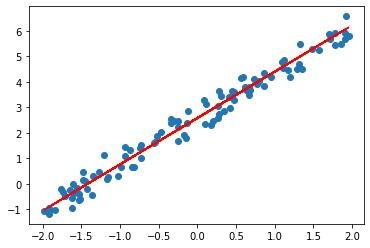

In [11]:
plt.scatter(x, y)
plt.plot(x, y_pred, c = 'red')
plt.show()

In [12]:
#reg.coefs = w
w1, w2 = np.array(reg.coefs_).reshape(-1)
#intercepts = b
b1, b2 = np.array(reg.intercepts_).reshape(-1)
print(w1, w2, b1, b2)

-2.0230772887975506 -0.8994147672147477 0.20843202333485145 2.7673419504355397


In [13]:
#最后得出的结果  接近我们自己定义的w 和 b
w1 * w2, w2 * b1 + b2

(1.8195855887612917, 2.5798751106877256)

### 反向传播权重更新

In [14]:
#创建四个随机数
w1, b1, w2, b2 = np.random.randn(4)

In [15]:
w1, b1, w2, b2

(-0.35399391125348395,
 -1.3749512934180188,
 -0.6436184028328905,
 -2.2234031522244266)

In [16]:
#获取正确y的值，作为参考值
y_real = y.reshape(-1, 1)
# 学习率
lr = 0.01

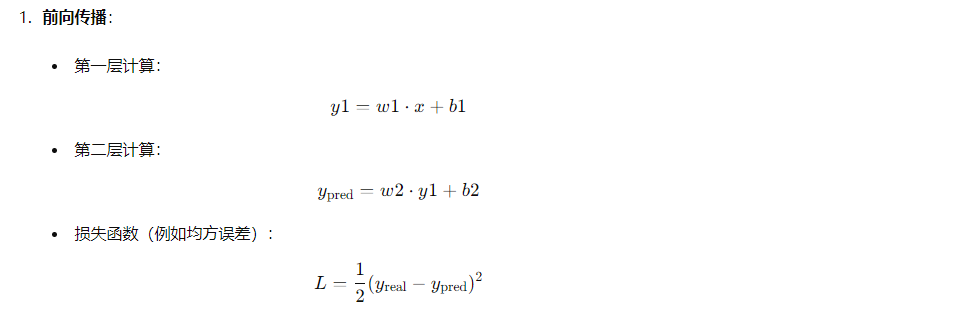


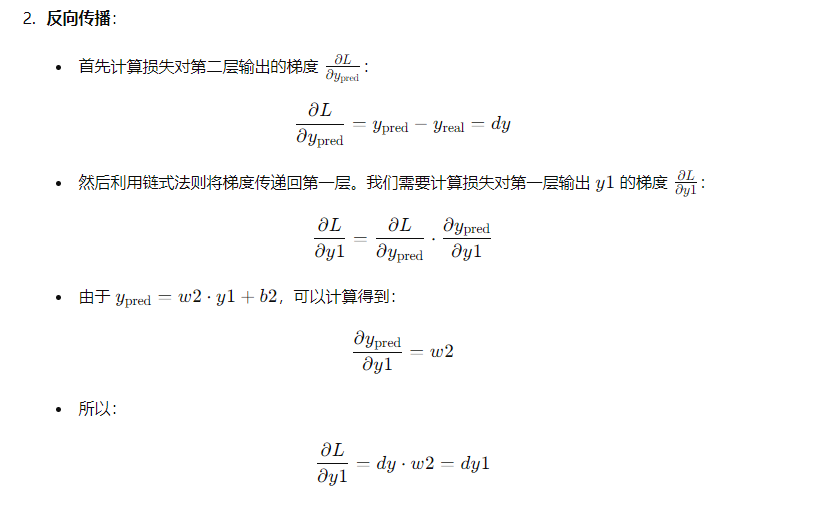

In [17]:
for i in range(100):
    # 正向传播
    y1 = w1 * x + b1
    y_pred = w2 * y1 + b2
    # loss = ((y_real - y_pred) ** 2) / 2: 计算均方误差损失。
    loss = ((y_real - y_pred) ** 2) / 2
    
    # y_pred - y_real 计算的是预测值和真实值之间的差异，这个差异称为误差（error）
    dy = y_pred - y_real
    #推到过程在上面
    dy1 = dy * w2


    #推导见下图
    #np.mean = 计算平均值
    #向量运算取均值
    # 计算是从dw2 db2开始的
    #y_pred = w2 * y1 +b2
    #dw2 =>al/aw2 =al/ a y_pred * ay_pred/aw2  =  dy *y1
    dw2 = np.mean(y1 * dy)
    
    db2 = np.mean(dy)
    
    dw1 = np.mean(x * dy1)
    db1 = np.mean(dy1)
    
    #通过这些步骤，每次迭代后，权重和偏置都会朝着减少损失的方向调整，从而使模型的预测逐渐逼近真实值，提升模型的性能。
    w1 = w1 - lr * dw1
    w2 = w2 - lr * dw2
    b1 = b1 - lr * db1
    b2 = b2 - lr * db2
    
print(w1, b1, w2, b2)

-0.9177449267250191 -2.129914286339166 -1.9504364639229044 -1.5893718385879363


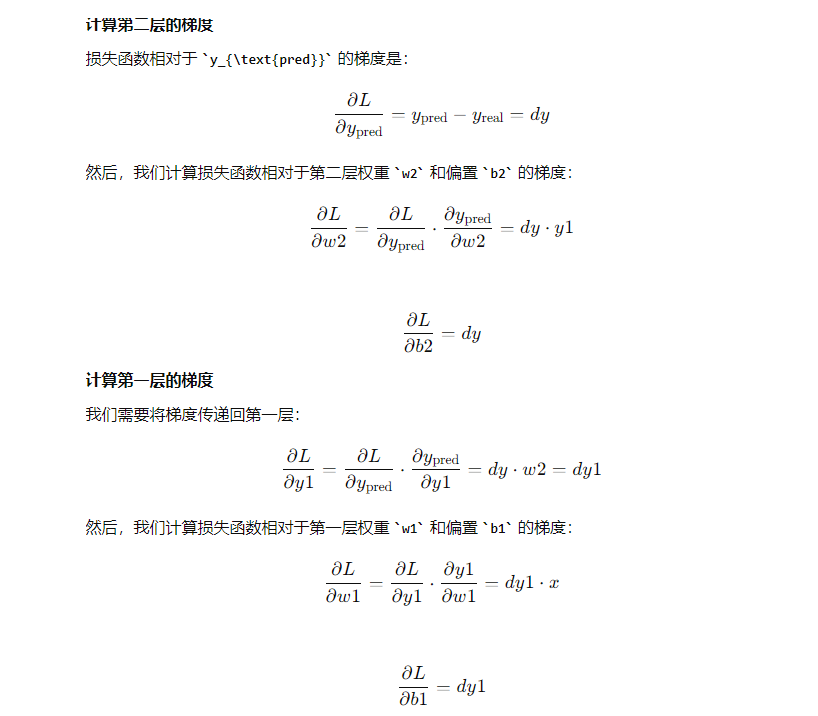


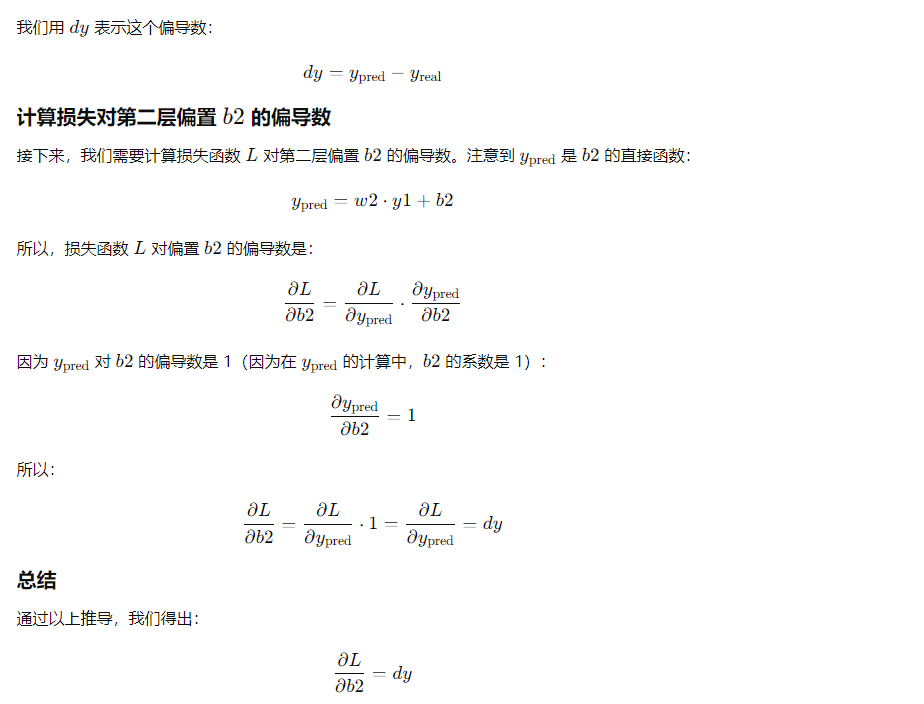


In [18]:
#y = w*x +b
y_pred = w2 * (w1 * x + b1) + b2

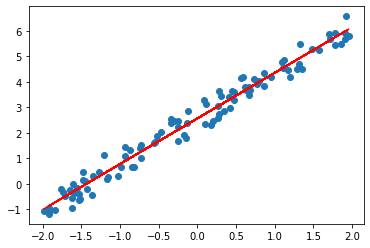

In [19]:
plt.scatter(x, y)
plt.plot(x, y_pred, c = 'red')
plt.show()

In [20]:
w1 * w2, w2 * b1 + b2

(1.7900031696647312, 2.564890650518303)